## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  27.713248  1519.103353  0.333548  4.961925  1.473669
1  79.572213   960.177906  0.833648  5.793318  1.450978
2  83.509151  1559.635374  0.402337  8.197262  1.473316
3  44.999085  1187.965304  0.509562  8.667154  1.525899
4  22.231748  1410.689079  0.496813  5.979138  1.404872


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9371769	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9284557	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9189334	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9082152	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9012714	total: 60ms	remaining: 11.9s
5:	learn: 0.8921188	total: 60.4ms	remaining: 10s
6:	learn: 0.8844401	total: 61ms	remaining: 8.65s
7:	learn: 0.8746663	total: 61.5ms	remaining: 7.62s
8:	learn: 0.8672944	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8635557	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8574257	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8504907	total: 63.5ms	remaining: 5.22s
12:	learn: 0.8418524	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8350600	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8260344	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8191602	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8123217	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8055936	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7974241	total: 66.6ms	remaining: 3.44s


112:	learn: 0.4373620	total: 108ms	remaining: 845ms
113:	learn: 0.4350918	total: 108ms	remaining: 840ms
114:	learn: 0.4326316	total: 109ms	remaining: 836ms
115:	learn: 0.4298363	total: 109ms	remaining: 832ms
116:	learn: 0.4274386	total: 110ms	remaining: 827ms
117:	learn: 0.4259154	total: 110ms	remaining: 822ms
118:	learn: 0.4237479	total: 110ms	remaining: 818ms
119:	learn: 0.4211551	total: 111ms	remaining: 813ms
120:	learn: 0.4199460	total: 111ms	remaining: 809ms
121:	learn: 0.4179307	total: 112ms	remaining: 804ms
122:	learn: 0.4153043	total: 112ms	remaining: 801ms
123:	learn: 0.4131304	total: 113ms	remaining: 797ms
124:	learn: 0.4105003	total: 113ms	remaining: 793ms
125:	learn: 0.4083748	total: 114ms	remaining: 788ms
126:	learn: 0.4065376	total: 114ms	remaining: 785ms
127:	learn: 0.4045557	total: 115ms	remaining: 780ms
128:	learn: 0.4033282	total: 115ms	remaining: 778ms
129:	learn: 0.4012096	total: 116ms	remaining: 774ms
130:	learn: 0.3987276	total: 116ms	remaining: 769ms
131:	learn: 

288:	learn: 0.2345355	total: 186ms	remaining: 457ms
289:	learn: 0.2342021	total: 186ms	remaining: 456ms
290:	learn: 0.2337694	total: 187ms	remaining: 457ms
291:	learn: 0.2334740	total: 188ms	remaining: 455ms
292:	learn: 0.2331379	total: 188ms	remaining: 454ms
293:	learn: 0.2328491	total: 188ms	remaining: 453ms
294:	learn: 0.2325640	total: 189ms	remaining: 451ms
295:	learn: 0.2319419	total: 189ms	remaining: 450ms
296:	learn: 0.2305310	total: 190ms	remaining: 449ms
297:	learn: 0.2295735	total: 190ms	remaining: 448ms
298:	learn: 0.2293303	total: 191ms	remaining: 447ms
299:	learn: 0.2287465	total: 191ms	remaining: 446ms
300:	learn: 0.2285147	total: 191ms	remaining: 444ms
301:	learn: 0.2271258	total: 192ms	remaining: 443ms
302:	learn: 0.2268290	total: 192ms	remaining: 442ms
303:	learn: 0.2258517	total: 192ms	remaining: 441ms
304:	learn: 0.2256141	total: 193ms	remaining: 440ms
305:	learn: 0.2247169	total: 193ms	remaining: 439ms
306:	learn: 0.2237689	total: 194ms	remaining: 437ms
307:	learn: 

521:	learn: 0.1203201	total: 289ms	remaining: 265ms
522:	learn: 0.1199491	total: 290ms	remaining: 265ms
523:	learn: 0.1196693	total: 291ms	remaining: 264ms
524:	learn: 0.1193057	total: 292ms	remaining: 264ms
525:	learn: 0.1190303	total: 292ms	remaining: 263ms
526:	learn: 0.1186740	total: 293ms	remaining: 263ms
527:	learn: 0.1183248	total: 293ms	remaining: 262ms
528:	learn: 0.1180536	total: 294ms	remaining: 261ms
529:	learn: 0.1177113	total: 294ms	remaining: 261ms
530:	learn: 0.1172350	total: 295ms	remaining: 260ms
531:	learn: 0.1169243	total: 295ms	remaining: 259ms
532:	learn: 0.1165922	total: 295ms	remaining: 259ms
533:	learn: 0.1163289	total: 296ms	remaining: 258ms
534:	learn: 0.1160280	total: 296ms	remaining: 257ms
535:	learn: 0.1157666	total: 297ms	remaining: 257ms
536:	learn: 0.1155094	total: 297ms	remaining: 256ms
537:	learn: 0.1150245	total: 297ms	remaining: 255ms
538:	learn: 0.1147324	total: 298ms	remaining: 255ms
539:	learn: 0.1144462	total: 298ms	remaining: 254ms
540:	learn: 

695:	learn: 0.0775807	total: 368ms	remaining: 161ms
696:	learn: 0.0774332	total: 369ms	remaining: 160ms
697:	learn: 0.0772068	total: 369ms	remaining: 160ms
698:	learn: 0.0771066	total: 370ms	remaining: 159ms
699:	learn: 0.0770077	total: 370ms	remaining: 159ms
700:	learn: 0.0767905	total: 370ms	remaining: 158ms
701:	learn: 0.0765591	total: 371ms	remaining: 157ms
702:	learn: 0.0764616	total: 371ms	remaining: 157ms
703:	learn: 0.0763201	total: 371ms	remaining: 156ms
704:	learn: 0.0762167	total: 372ms	remaining: 156ms
705:	learn: 0.0760777	total: 372ms	remaining: 155ms
706:	learn: 0.0758539	total: 373ms	remaining: 154ms
707:	learn: 0.0757571	total: 373ms	remaining: 154ms
708:	learn: 0.0756571	total: 373ms	remaining: 153ms
709:	learn: 0.0755211	total: 374ms	remaining: 153ms
710:	learn: 0.0754224	total: 374ms	remaining: 152ms
711:	learn: 0.0753176	total: 375ms	remaining: 152ms
712:	learn: 0.0751839	total: 375ms	remaining: 151ms
713:	learn: 0.0749917	total: 375ms	remaining: 150ms
714:	learn: 

891:	learn: 0.0568917	total: 455ms	remaining: 55.1ms
892:	learn: 0.0567842	total: 456ms	remaining: 54.6ms
893:	learn: 0.0566765	total: 456ms	remaining: 54.1ms
894:	learn: 0.0565581	total: 457ms	remaining: 53.6ms
895:	learn: 0.0564410	total: 457ms	remaining: 53.1ms
896:	learn: 0.0563493	total: 458ms	remaining: 52.5ms
897:	learn: 0.0562928	total: 458ms	remaining: 52ms
898:	learn: 0.0561774	total: 458ms	remaining: 51.5ms
899:	learn: 0.0561570	total: 459ms	remaining: 51ms
900:	learn: 0.0561027	total: 459ms	remaining: 50.4ms
901:	learn: 0.0559886	total: 459ms	remaining: 49.9ms
902:	learn: 0.0558993	total: 460ms	remaining: 49.4ms
903:	learn: 0.0558319	total: 460ms	remaining: 48.9ms
904:	learn: 0.0557193	total: 461ms	remaining: 48.4ms
905:	learn: 0.0556518	total: 461ms	remaining: 47.8ms
906:	learn: 0.0555404	total: 462ms	remaining: 47.3ms
907:	learn: 0.0554365	total: 462ms	remaining: 46.8ms
908:	learn: 0.0551350	total: 463ms	remaining: 46.3ms
909:	learn: 0.0550688	total: 463ms	remaining: 45.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

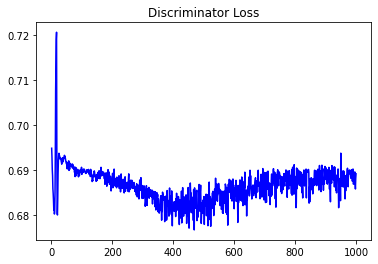

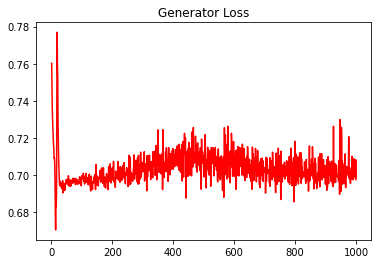

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6844040268901808


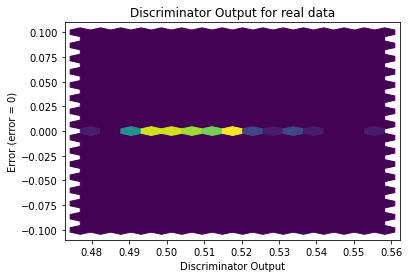

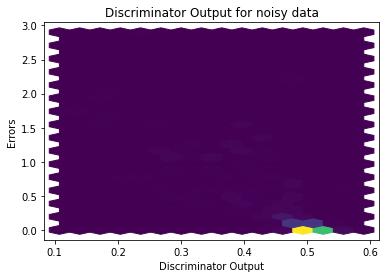

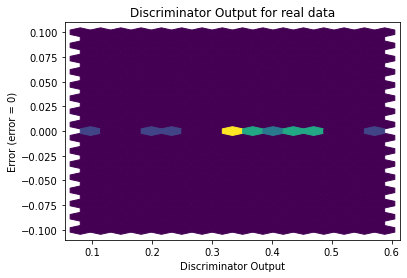

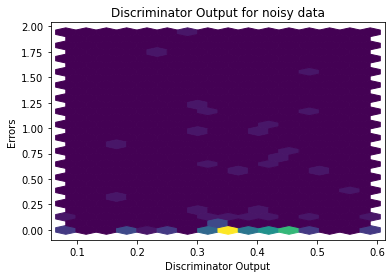

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


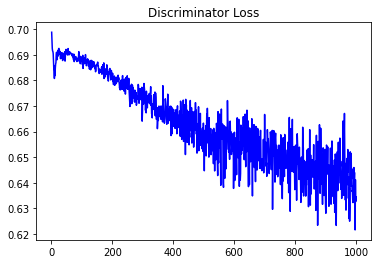

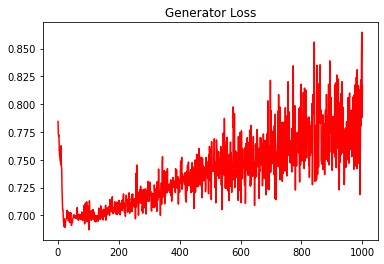

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6004529453480137


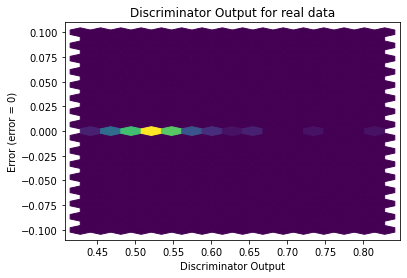

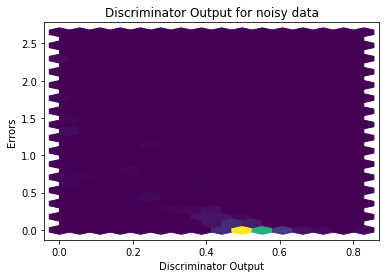

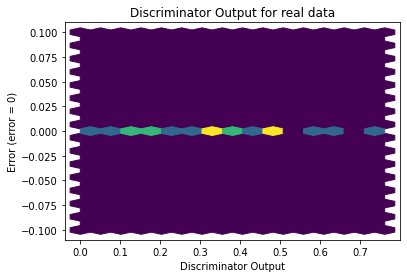

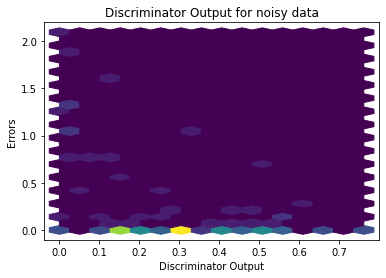

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1984]], requires_grad=True)
